
# Decision Tree Visualization
**Decision Tree**

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each node finds the best threshold on that feature to further classify/predict more accurately, each branch represents an outcome of that threshold, and each leaf node holds a class label.

In [28]:
# to visualize Decision trees
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt 
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
# Prepare the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
# Dataframe just to visualize the data in a better way
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## Defining the function for the tree

In [6]:
def accuracy(y_true, y_pred):
    return np.mean(np.equal(y_true, y_pred))

In [25]:
def MyDecisionTree(criterion = 'gini', splitter = 'best', max_depth = None, min_samples_split = 2,
                   min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = None, 
                   random_state = None, i = 1):
    
    # Initialize the model
    clf = DecisionTreeClassifier( criterion, splitter, max_depth, 
                                  min_samples_split, min_samples_leaf, min_weight_fraction_leaf, 
                                  max_features, random_state)
    
    # Fir the model
    clf.fit(X,y)
    
    # Gives text representation to the decision tree trained
    text_representation = tree.export_text(clf)
    print(text_representation)
    
    # To save the above info in a text file
    with open("Outputs/Decision_tree"+str(i)+".log", "w") as fout:
        fout.write(text_representation)
        
        # Calculating the accuracy
        y_pred = clf.predict(X)
        print(f"The accuracy of our tree : {accuracy(y, y_pred)}")
        
        fout.write(f"The accuracy of our model : {accuracy(y, y_pred)}")
        
    fout.close()
    print("Saved the file as: "+"Decision_tree"+str(i)+".log")
        
    # To plot the tree
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(clf, 
                       feature_names=iris.feature_names,  
                       class_names=iris.target_names,
                       filled=True)
    
    # Save the figure
    fig.savefig("Outputs/Decision_tree"+str(i)+".png")
    print("Saved the image as: "+"Decision_tree"+str(i)+".png")

### Making the predictions

|--- feature_3 <= 0.79
|   |--- class: 0
|--- feature_3 >  0.79
|   |--- class: 1

The accuracy of our tree : 0.6666666666666666
Saved the file as: Decision_tree1.log
Saved the image as: Decision_tree1.png
|--- feature_0 <= 5.55
|   |--- class: 0
|--- feature_0 >  5.55
|   |--- class: 2

The accuracy of our tree : 0.64
Saved the file as: Decision_tree2.log
Saved the image as: Decision_tree2.png
|--- feature_2 <= 5.37
|   |--- feature_2 <= 4.86
|   |   |--- feature_0 <= 5.90
|   |   |   |--- class: 0
|   |   |--- feature_0 >  5.90
|   |   |   |--- class: 1
|   |--- feature_2 >  4.86
|   |   |--- class: 2
|--- feature_2 >  5.37
|   |--- class: 2

The accuracy of our tree : 0.78
Saved the file as: Decision_tree3.log
Saved the image as: Decision_tree3.png
|--- feature_3 <= 1.77
|   |--- class: 0
|--- feature_3 >  1.77
|   |--- class: 2

The accuracy of our tree : 0.6333333333333333
Saved the file as: Decision_tree4.log
Saved the image as: Decision_tree4.png
|--- feature_0 <= 5.36
|   |--- 

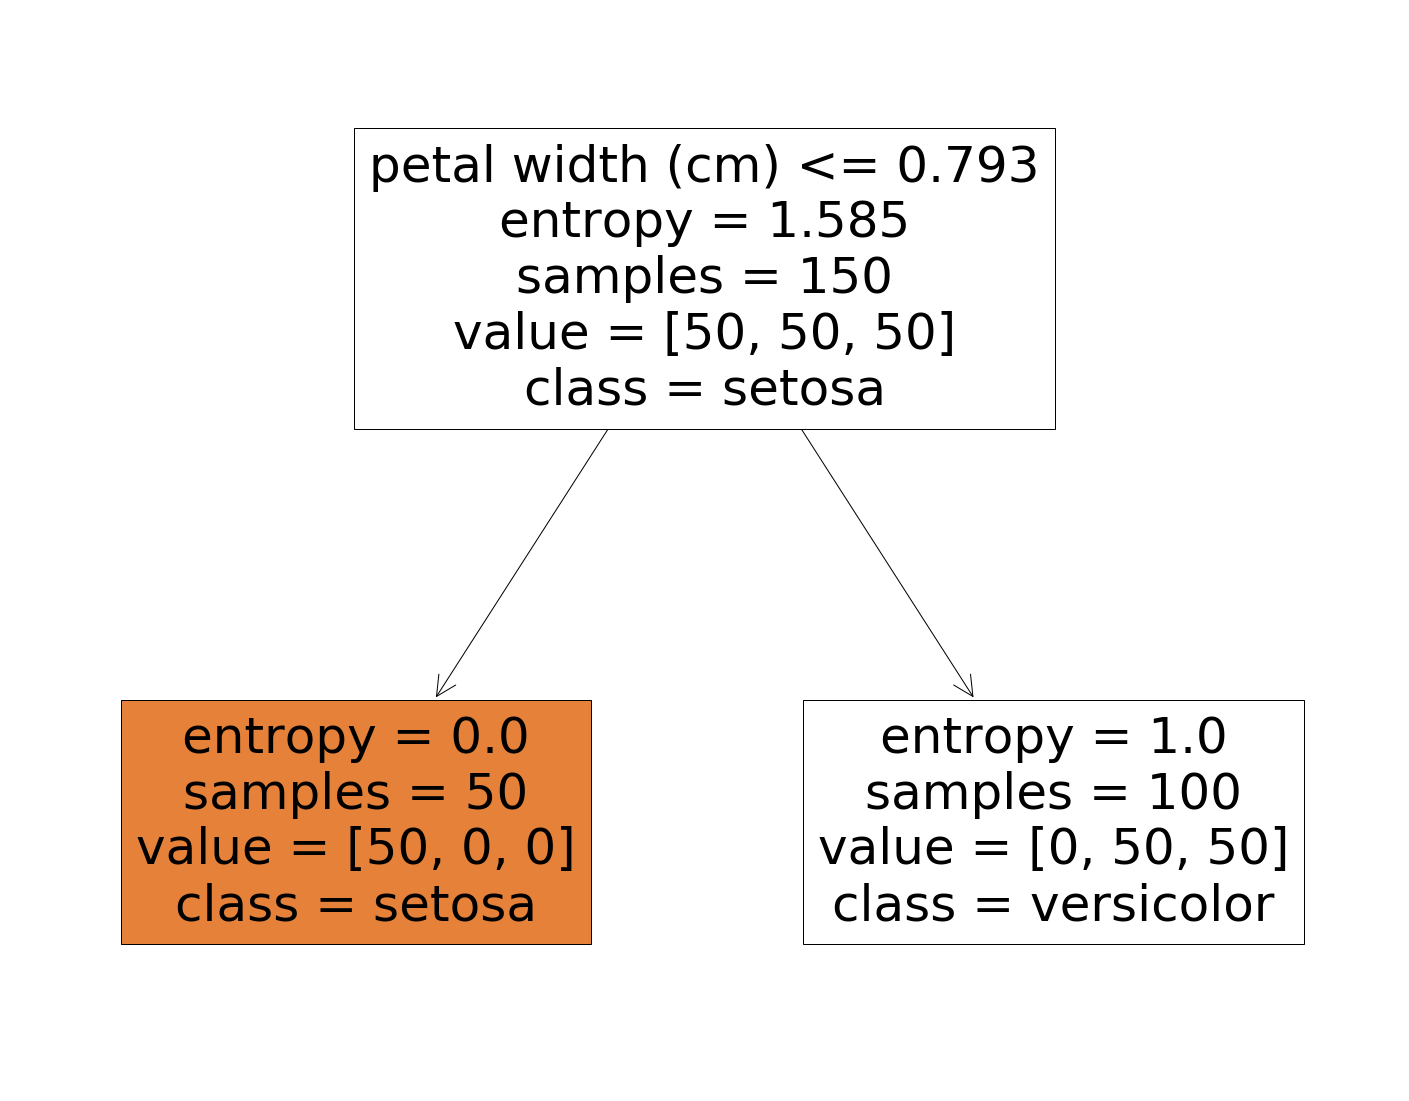

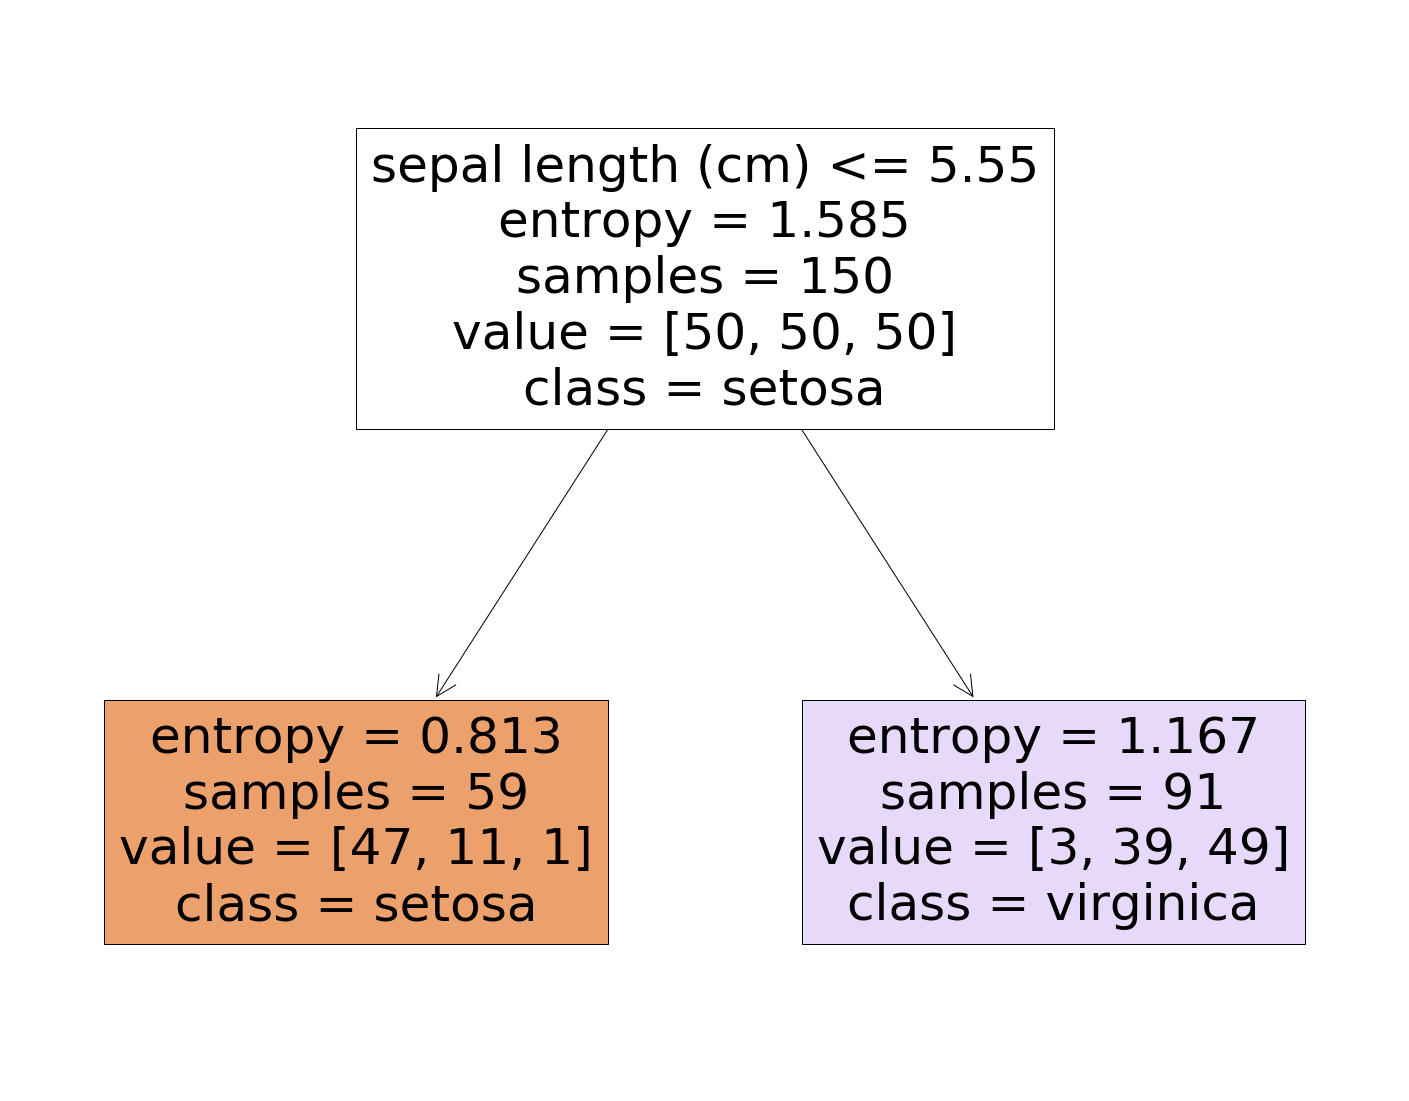

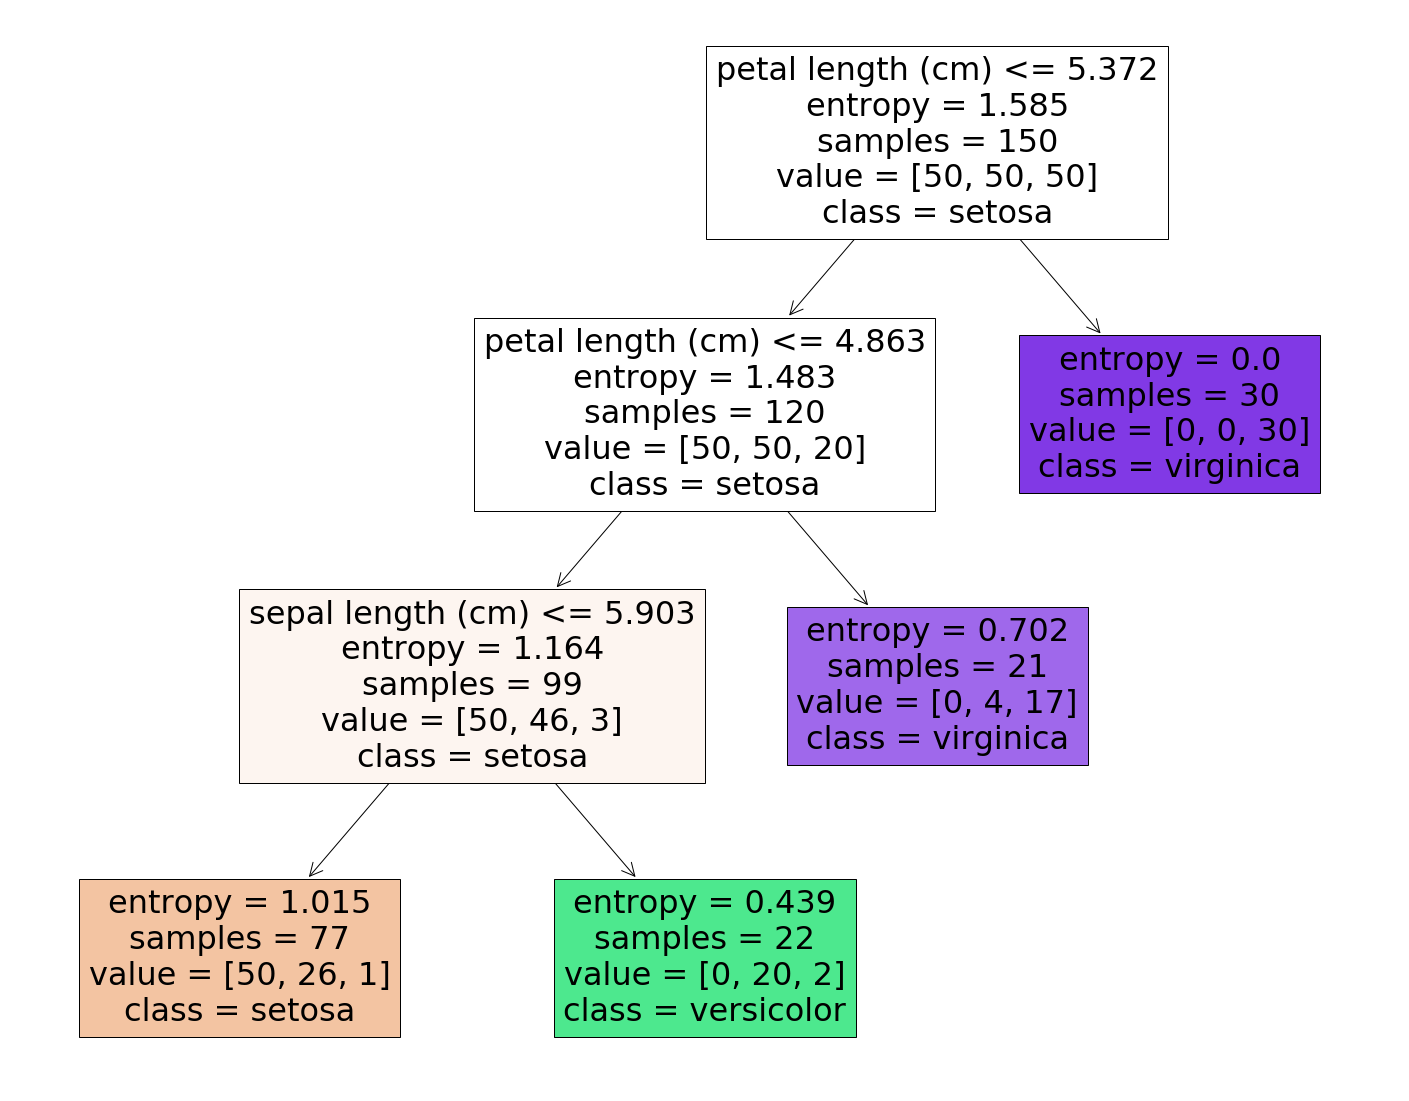

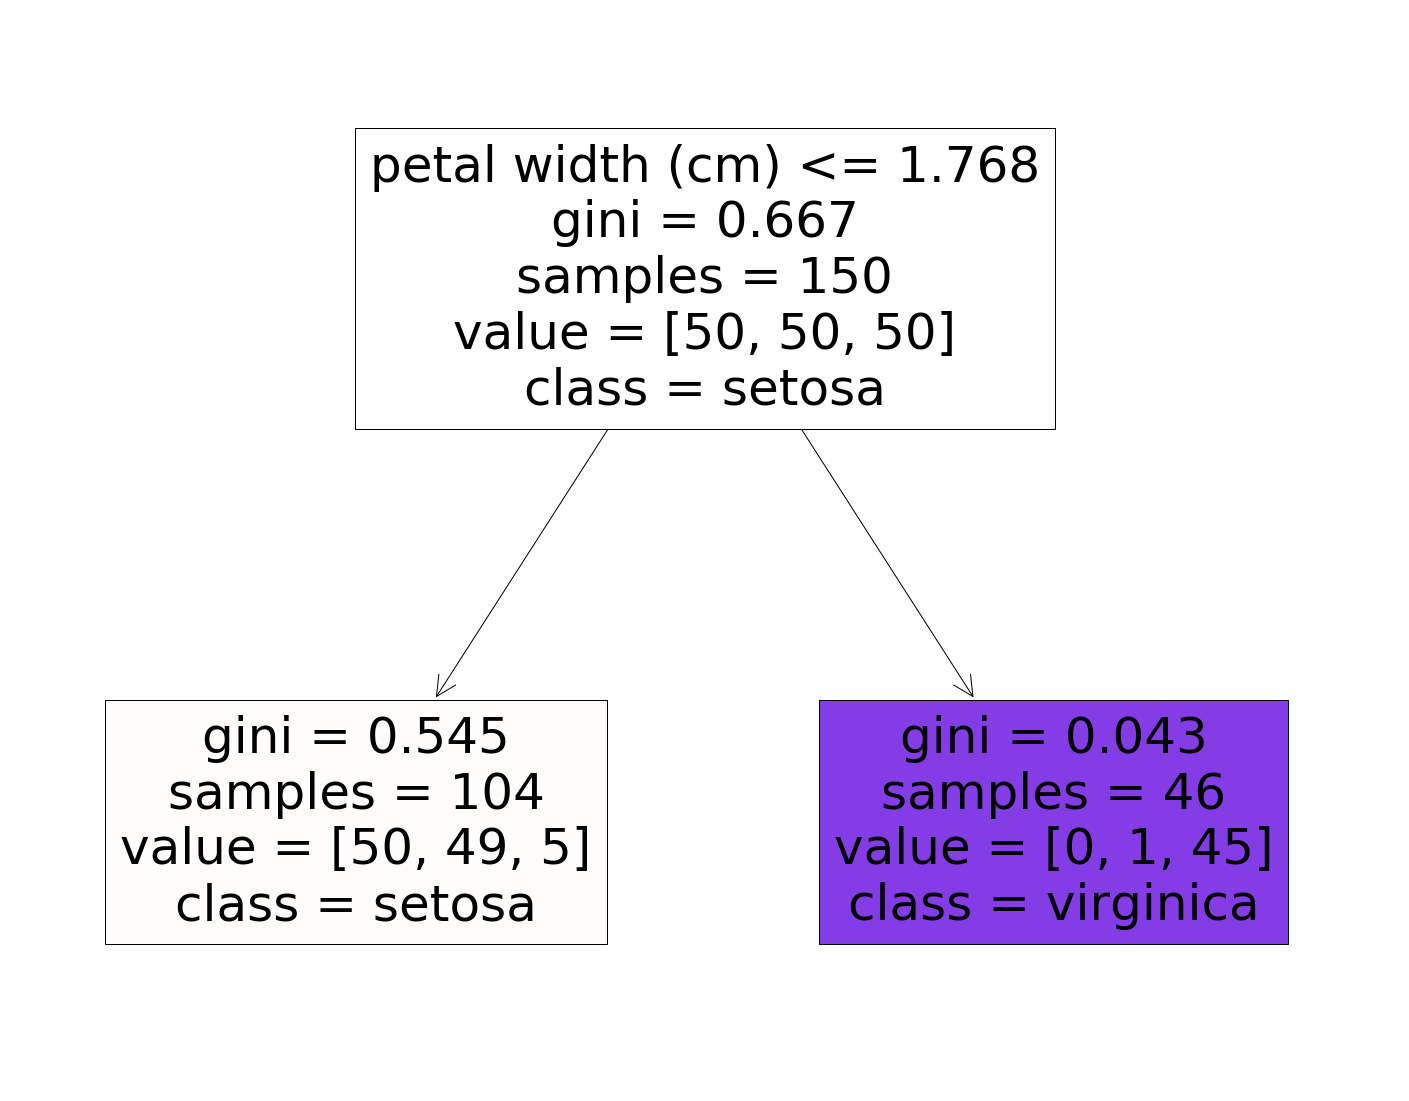

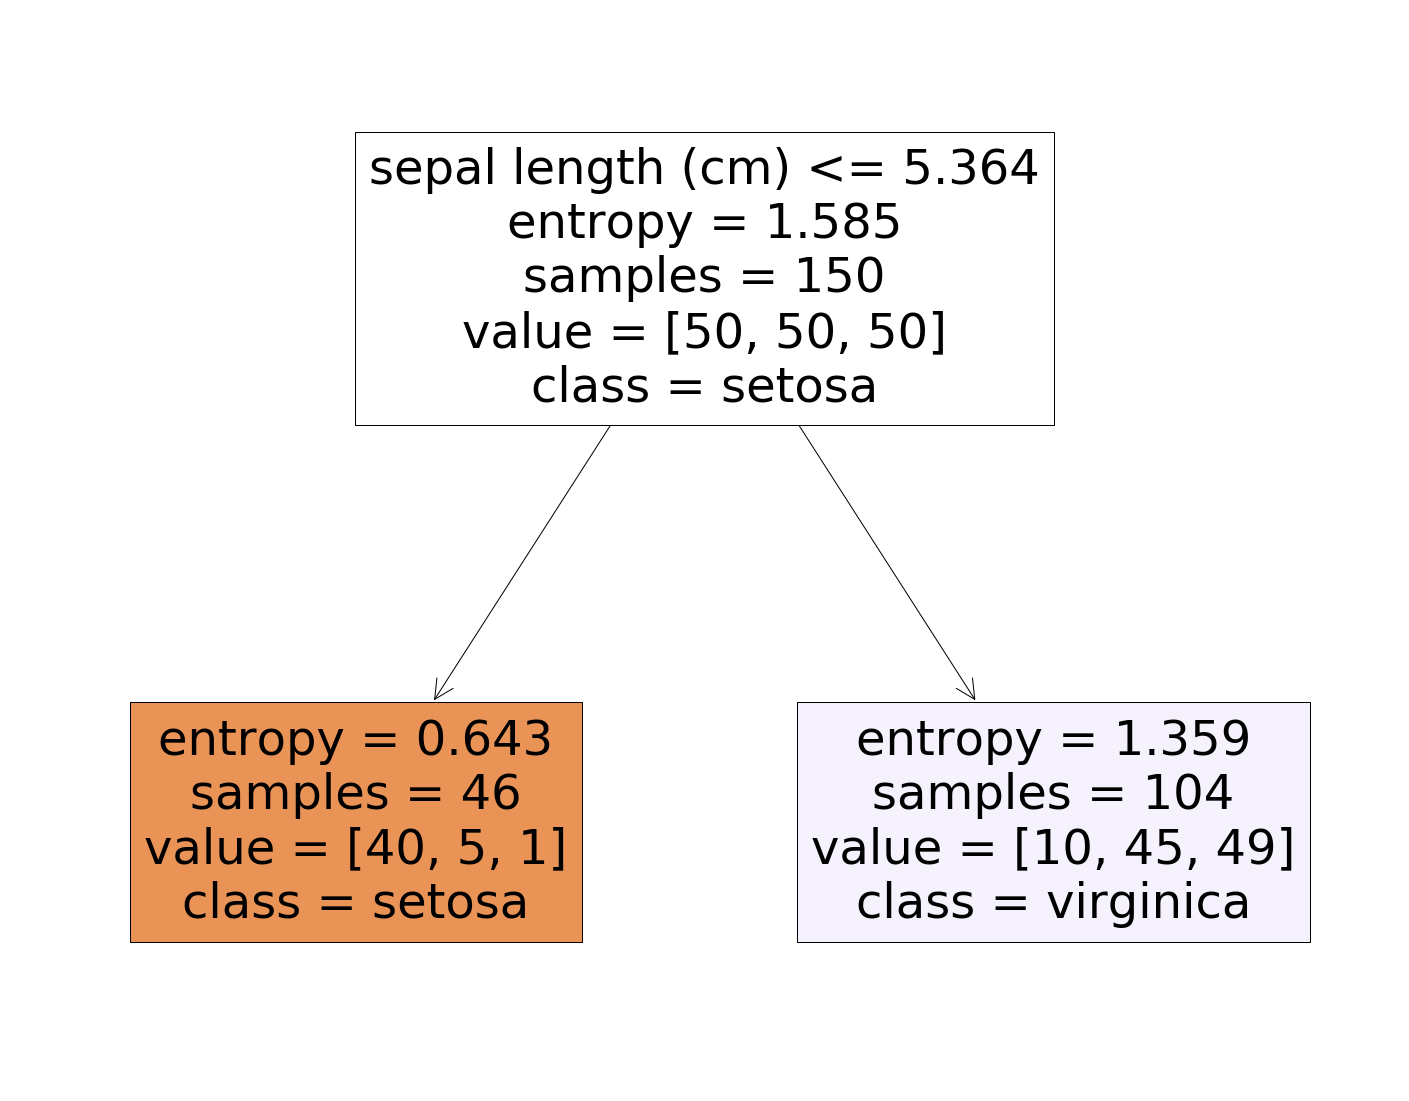

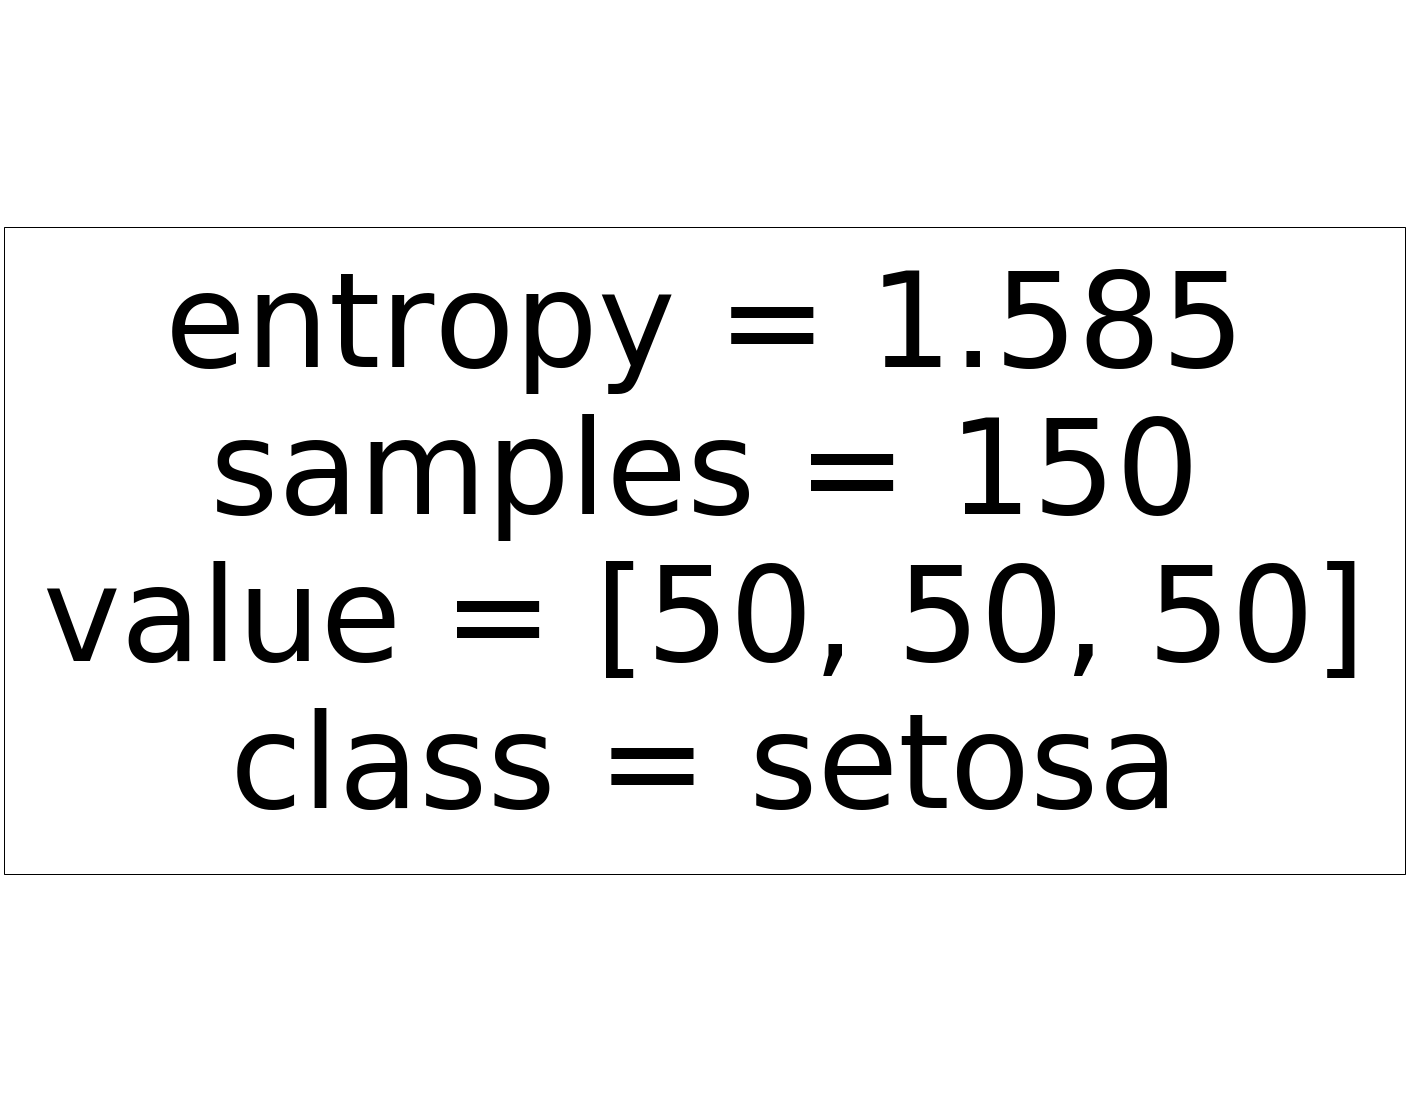

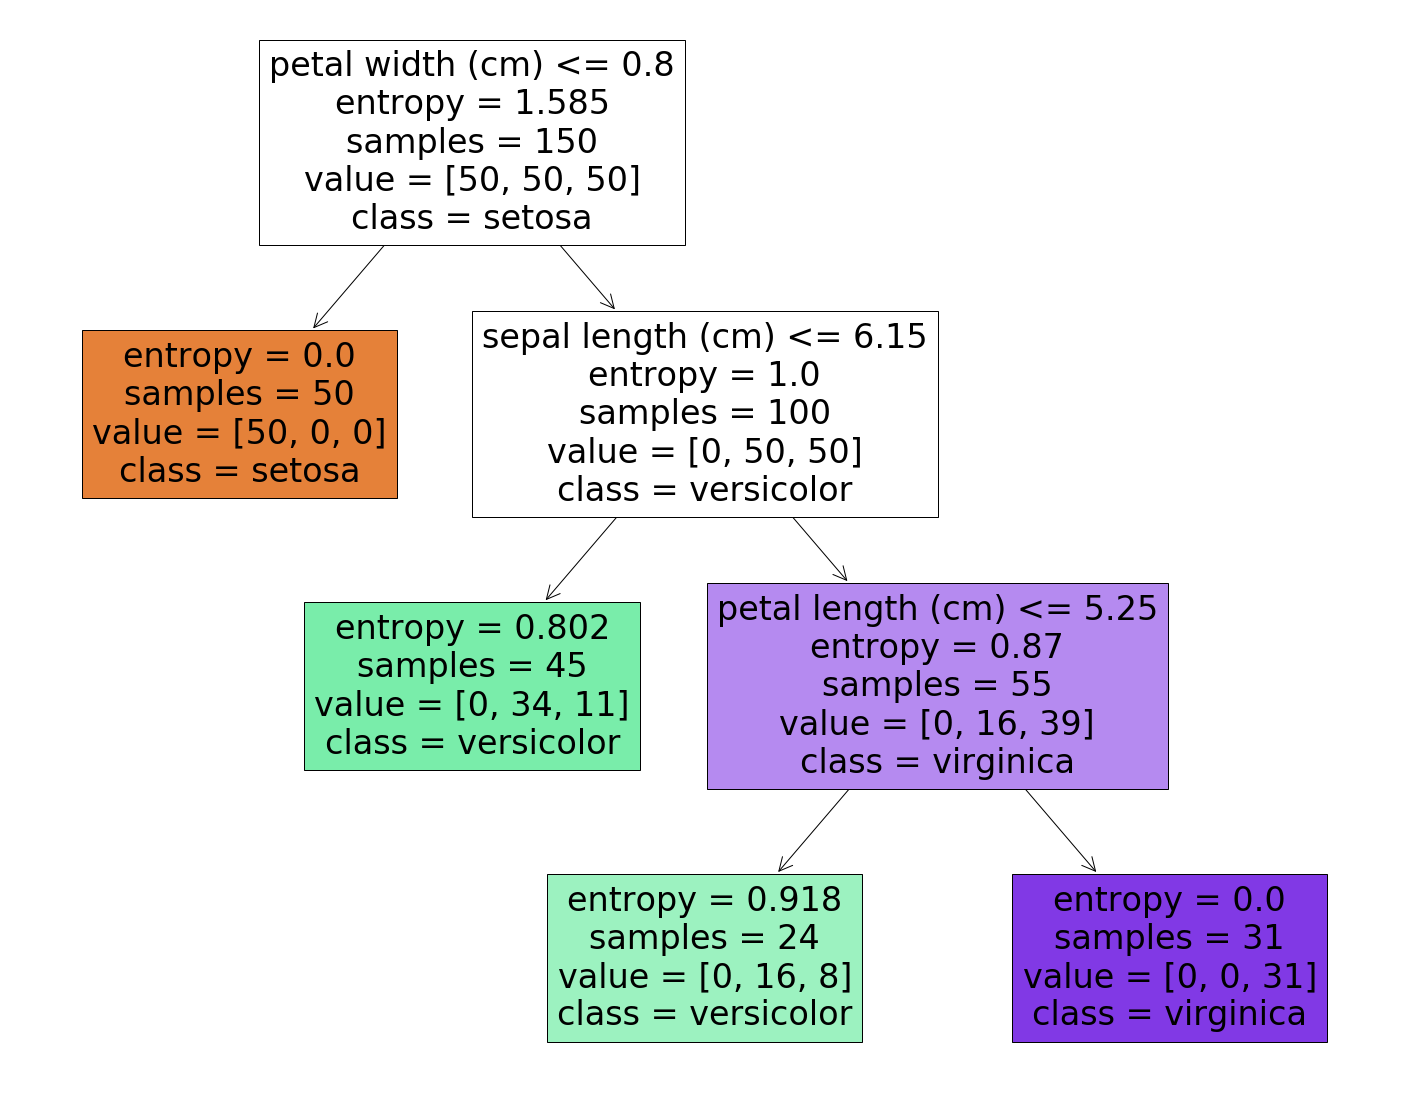

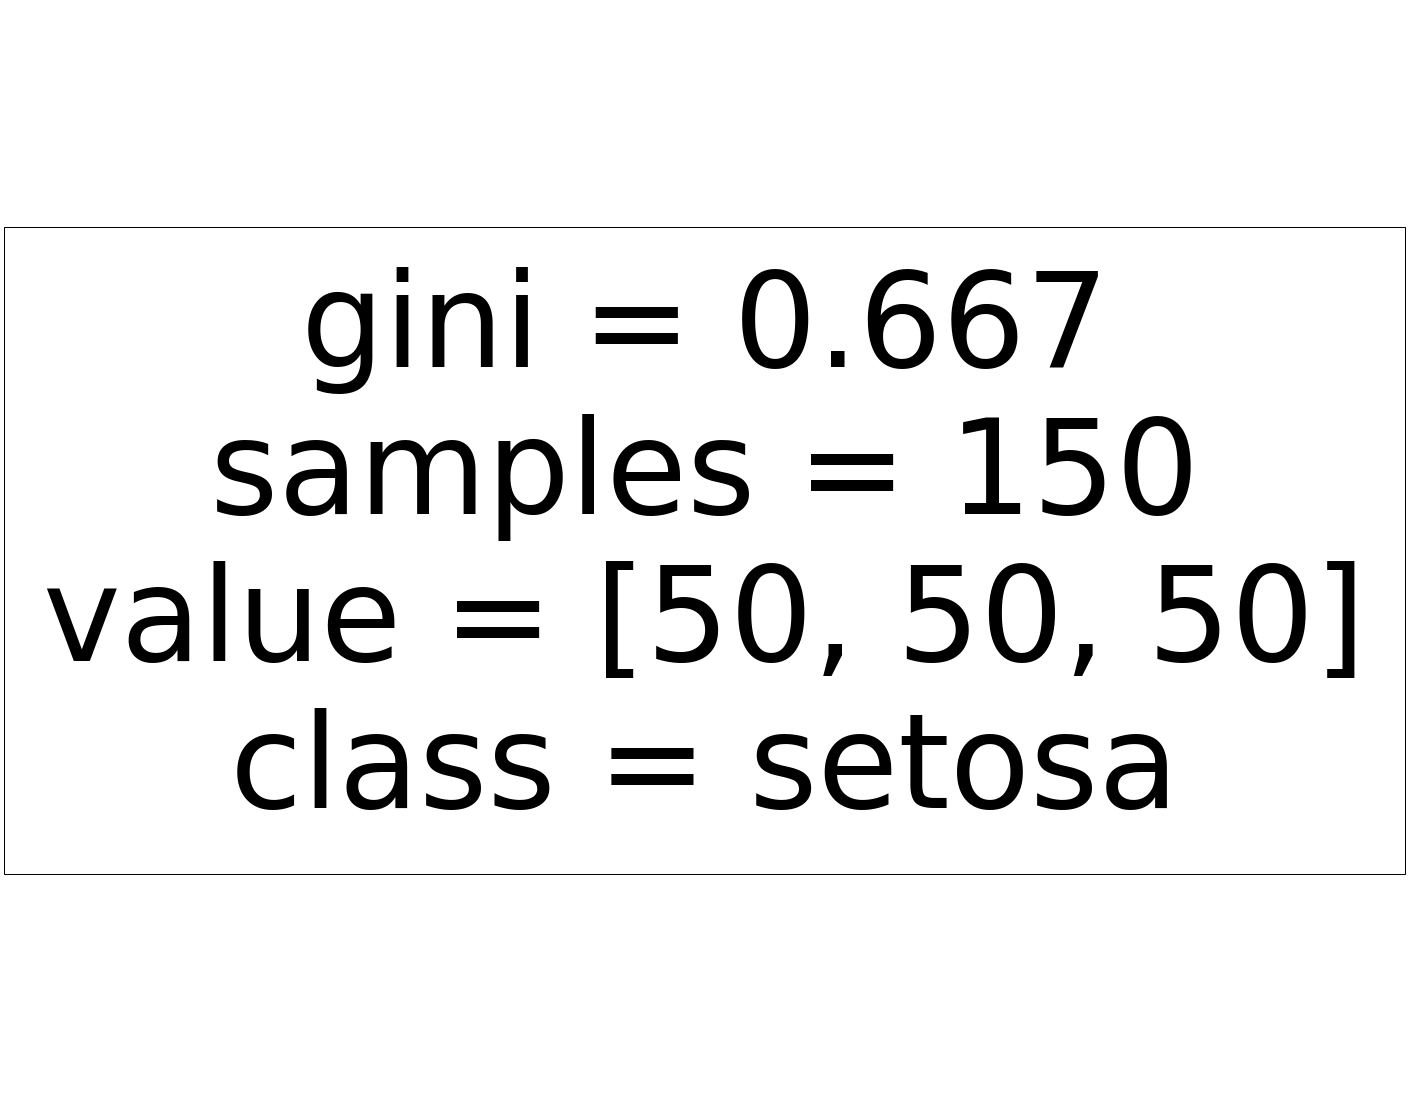

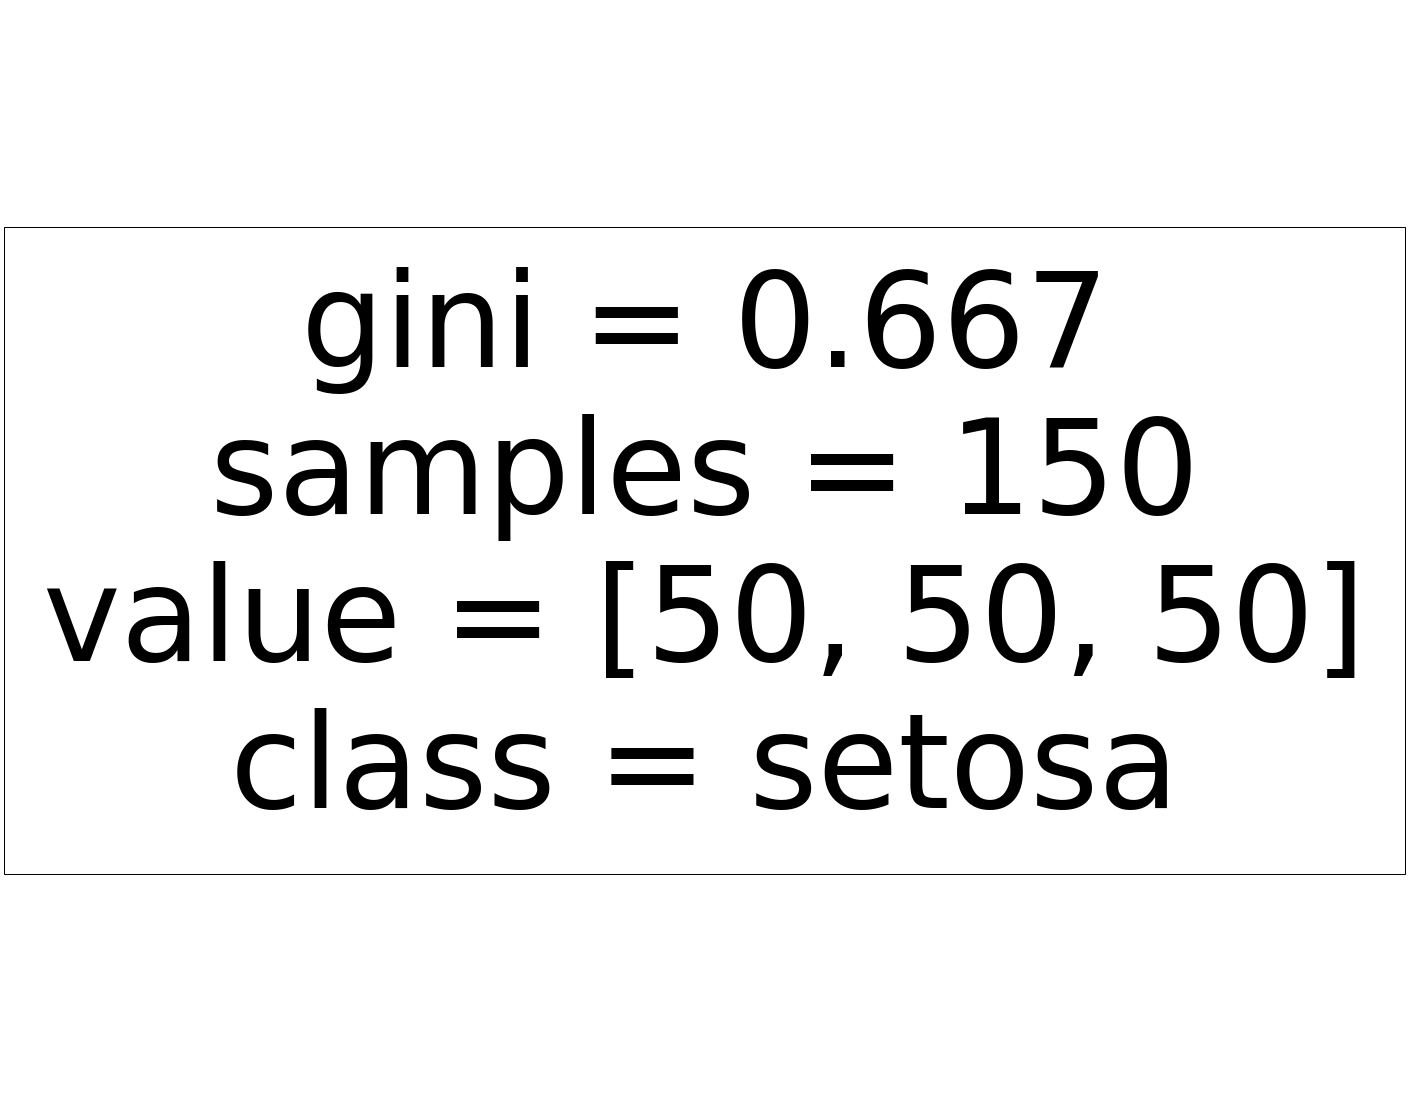

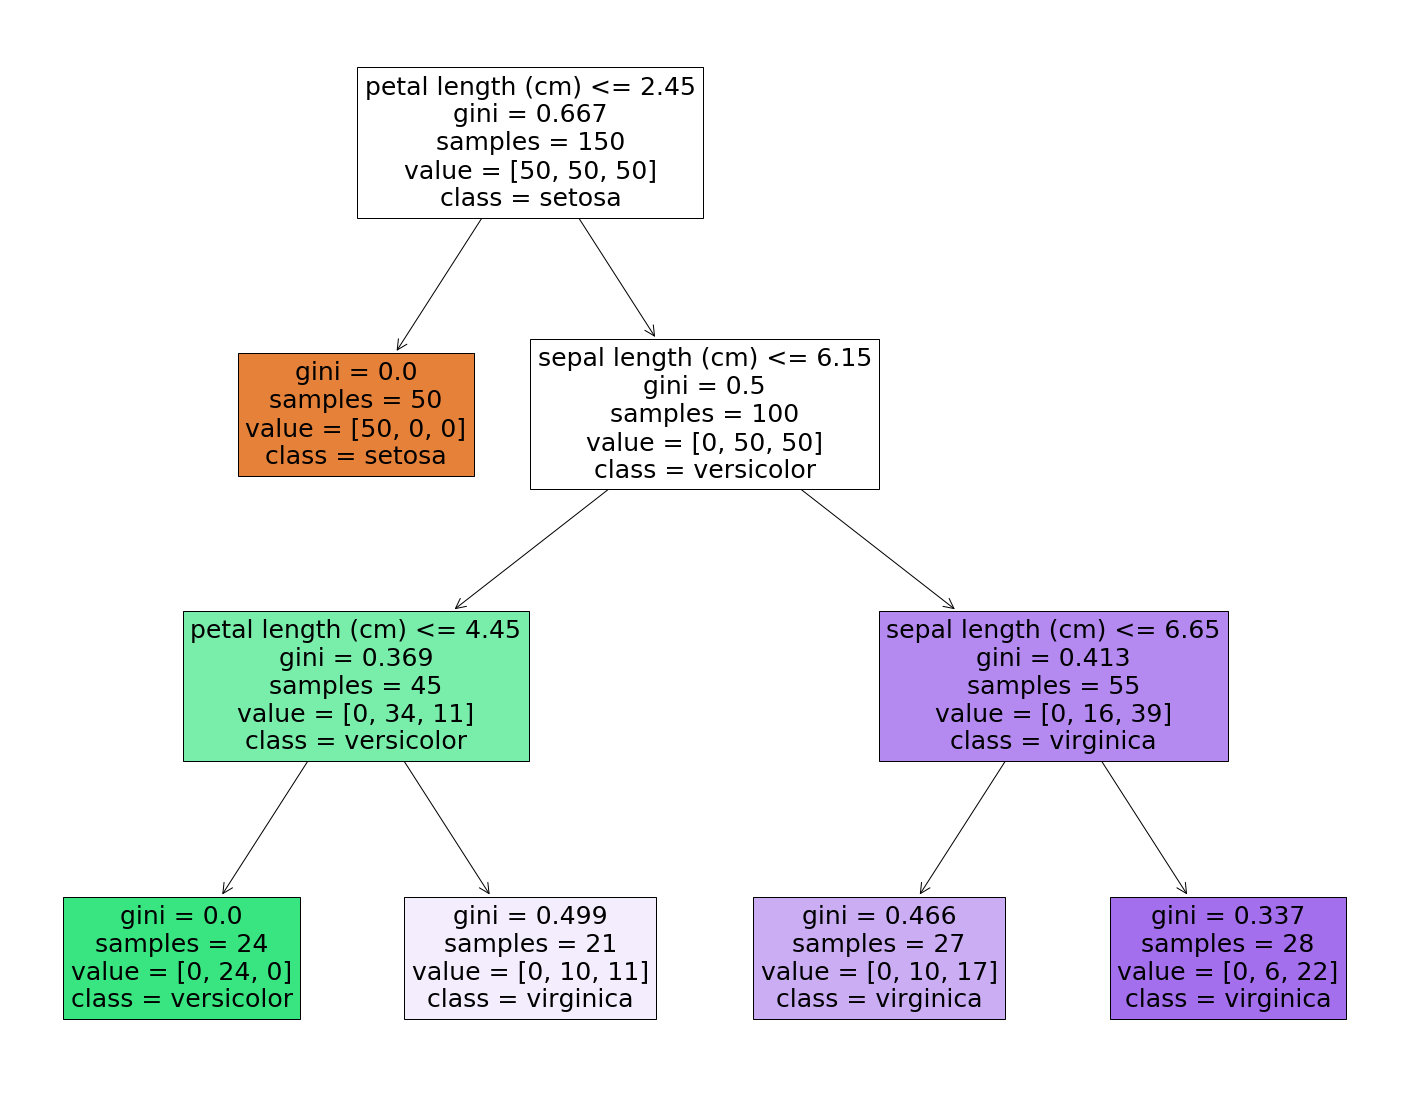

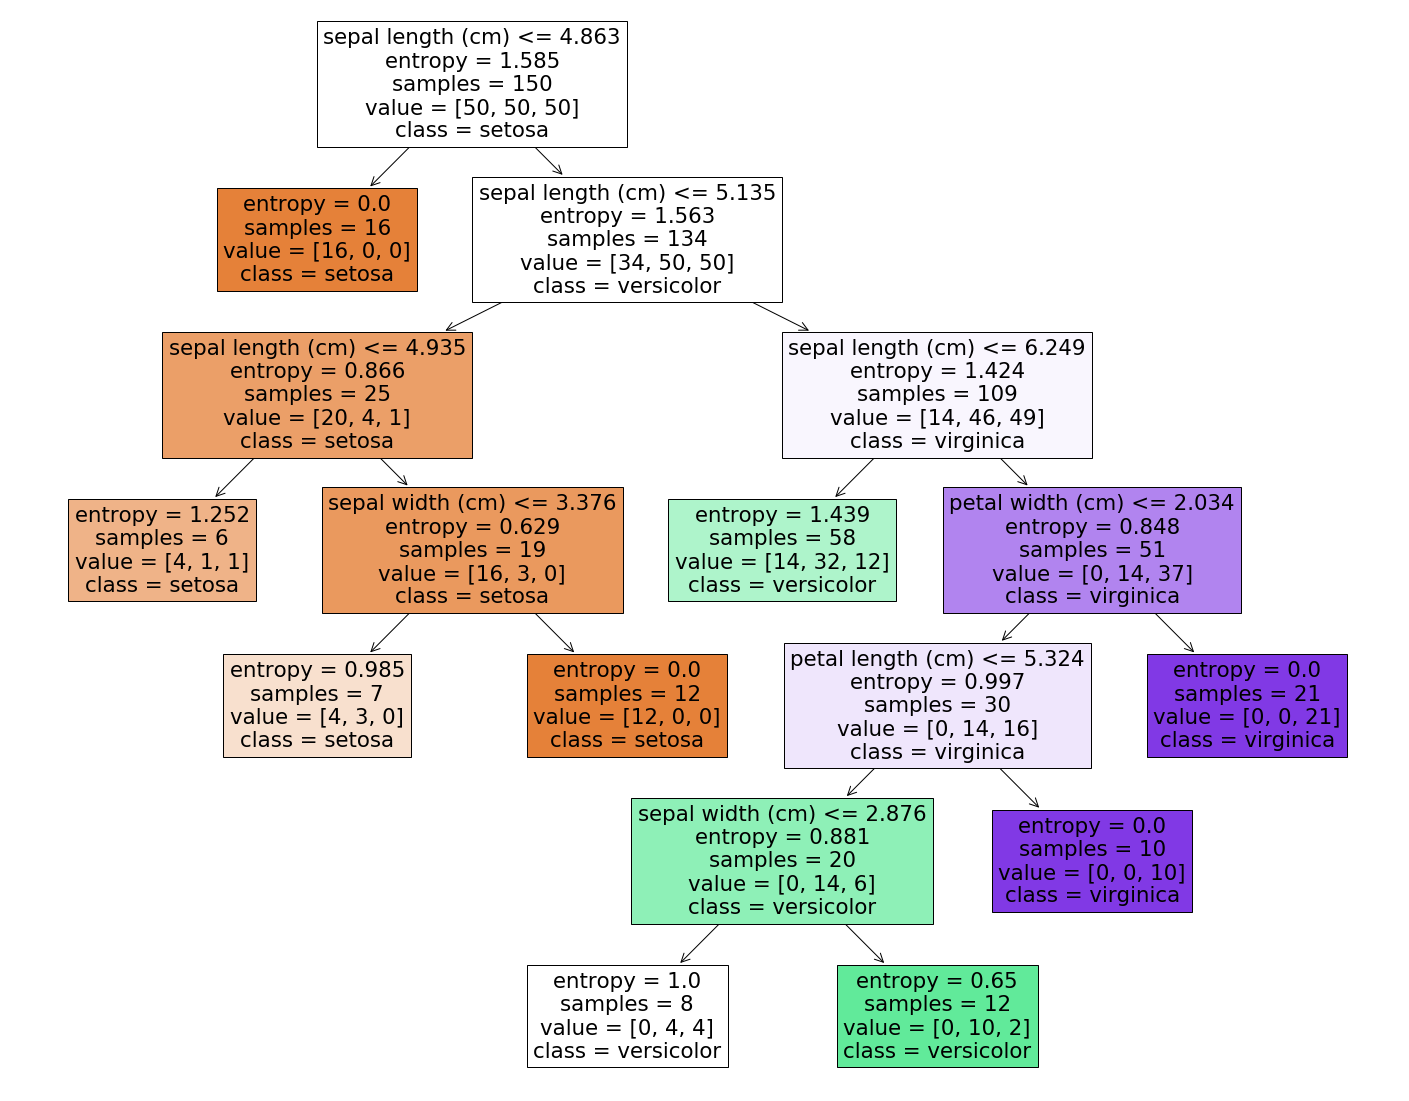

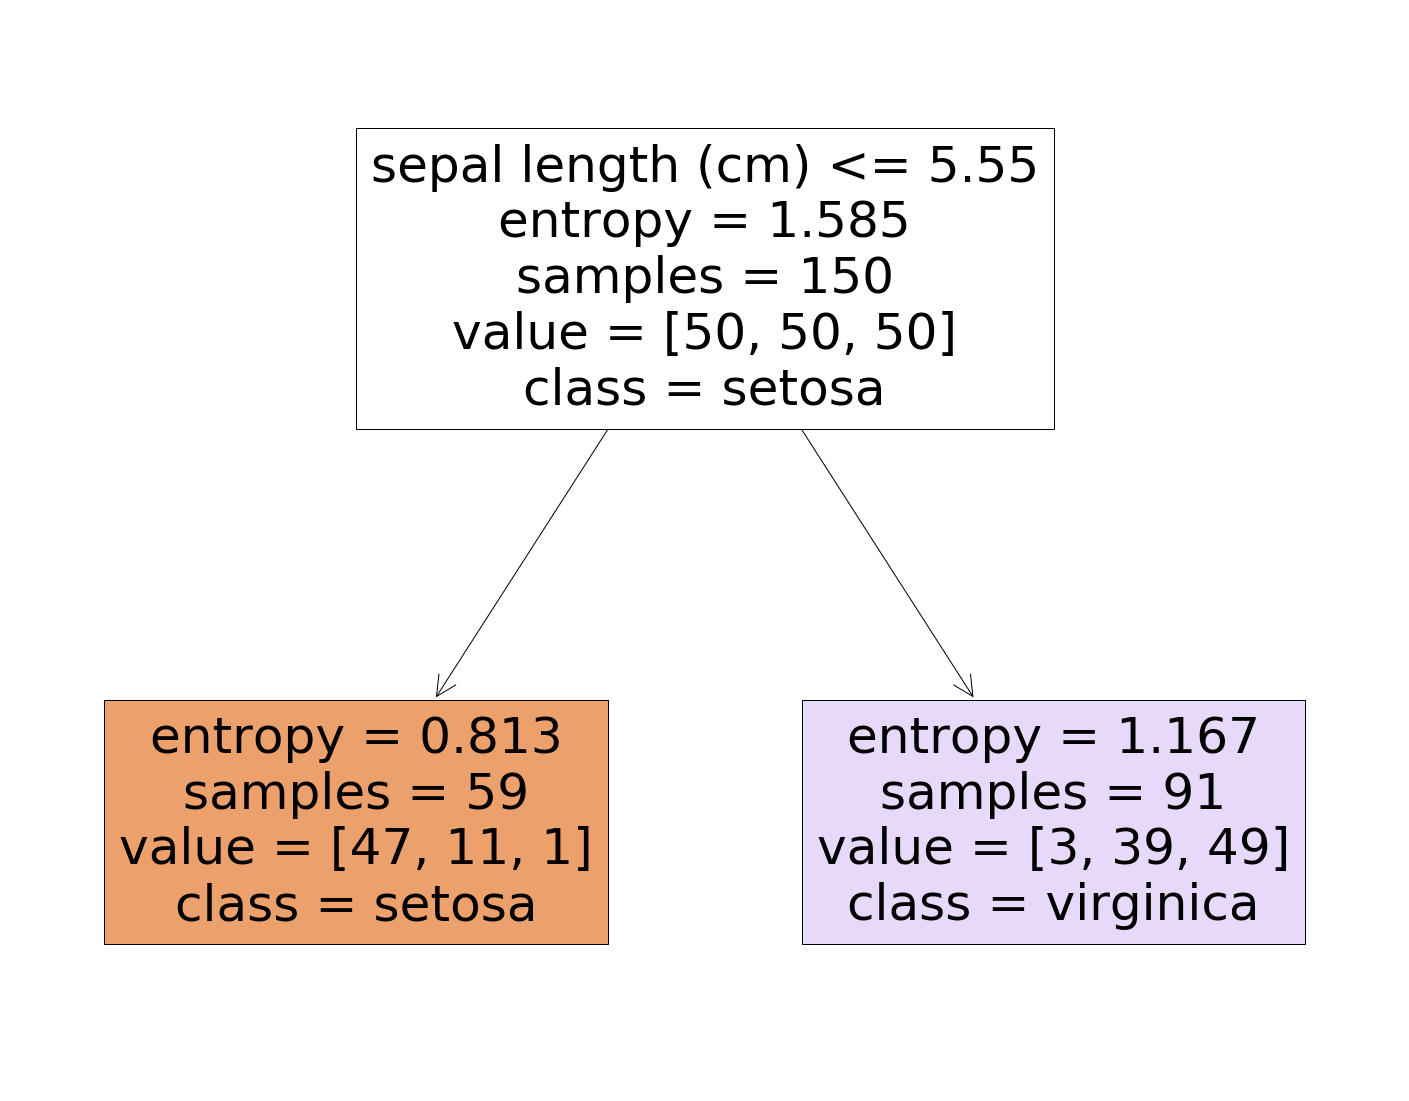

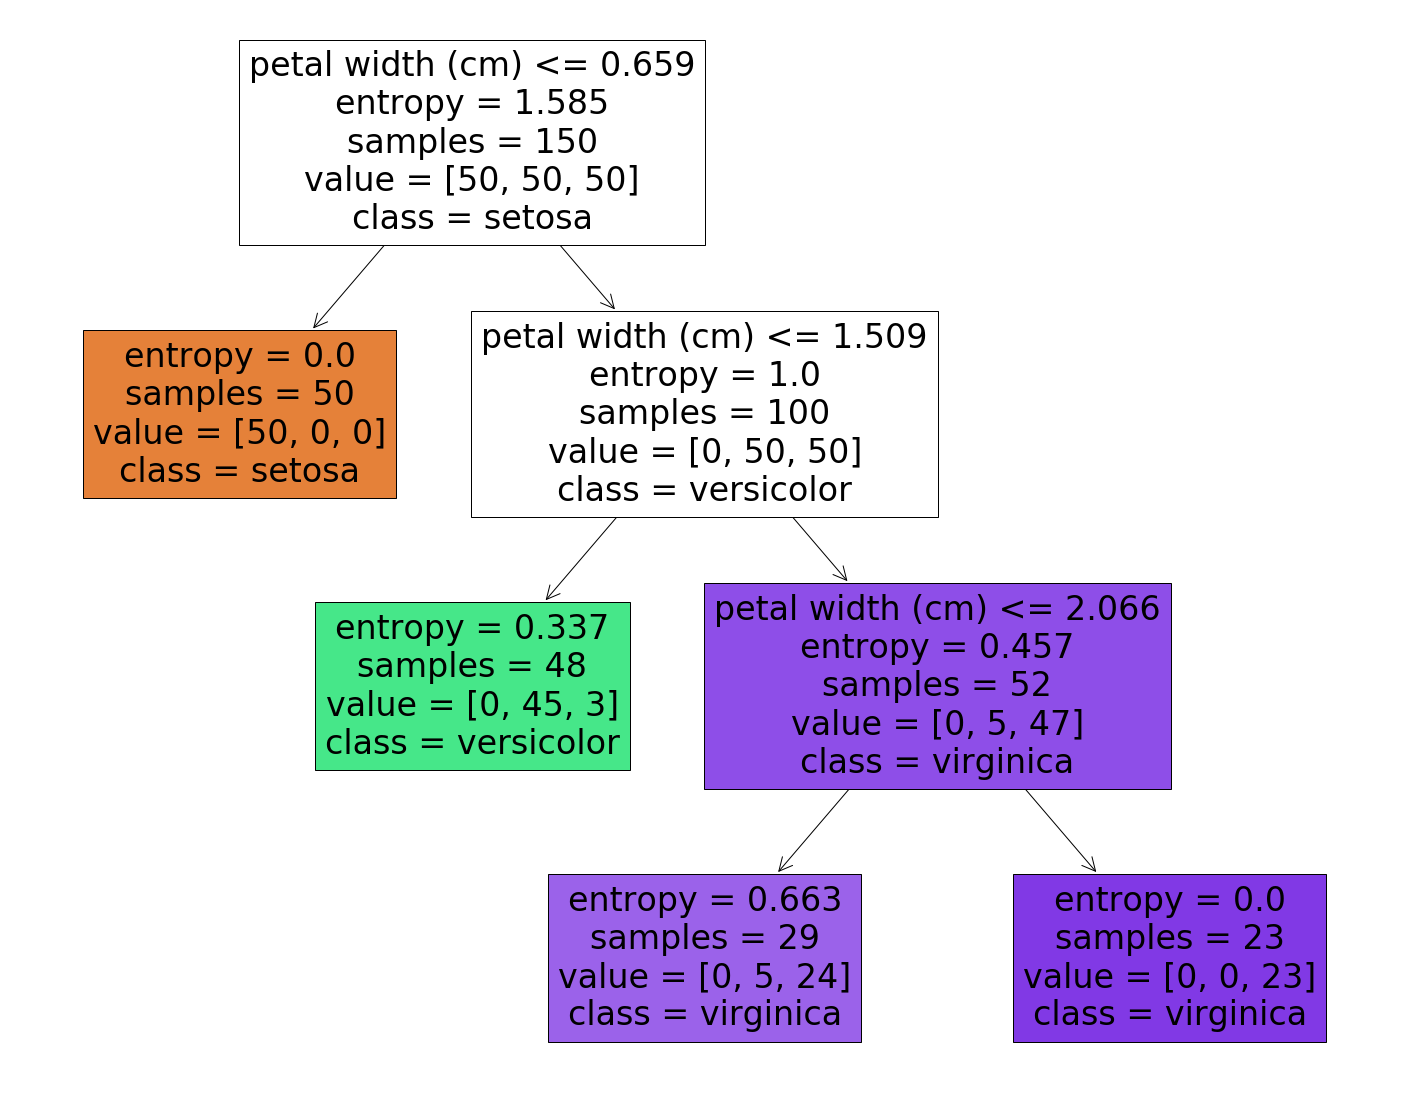

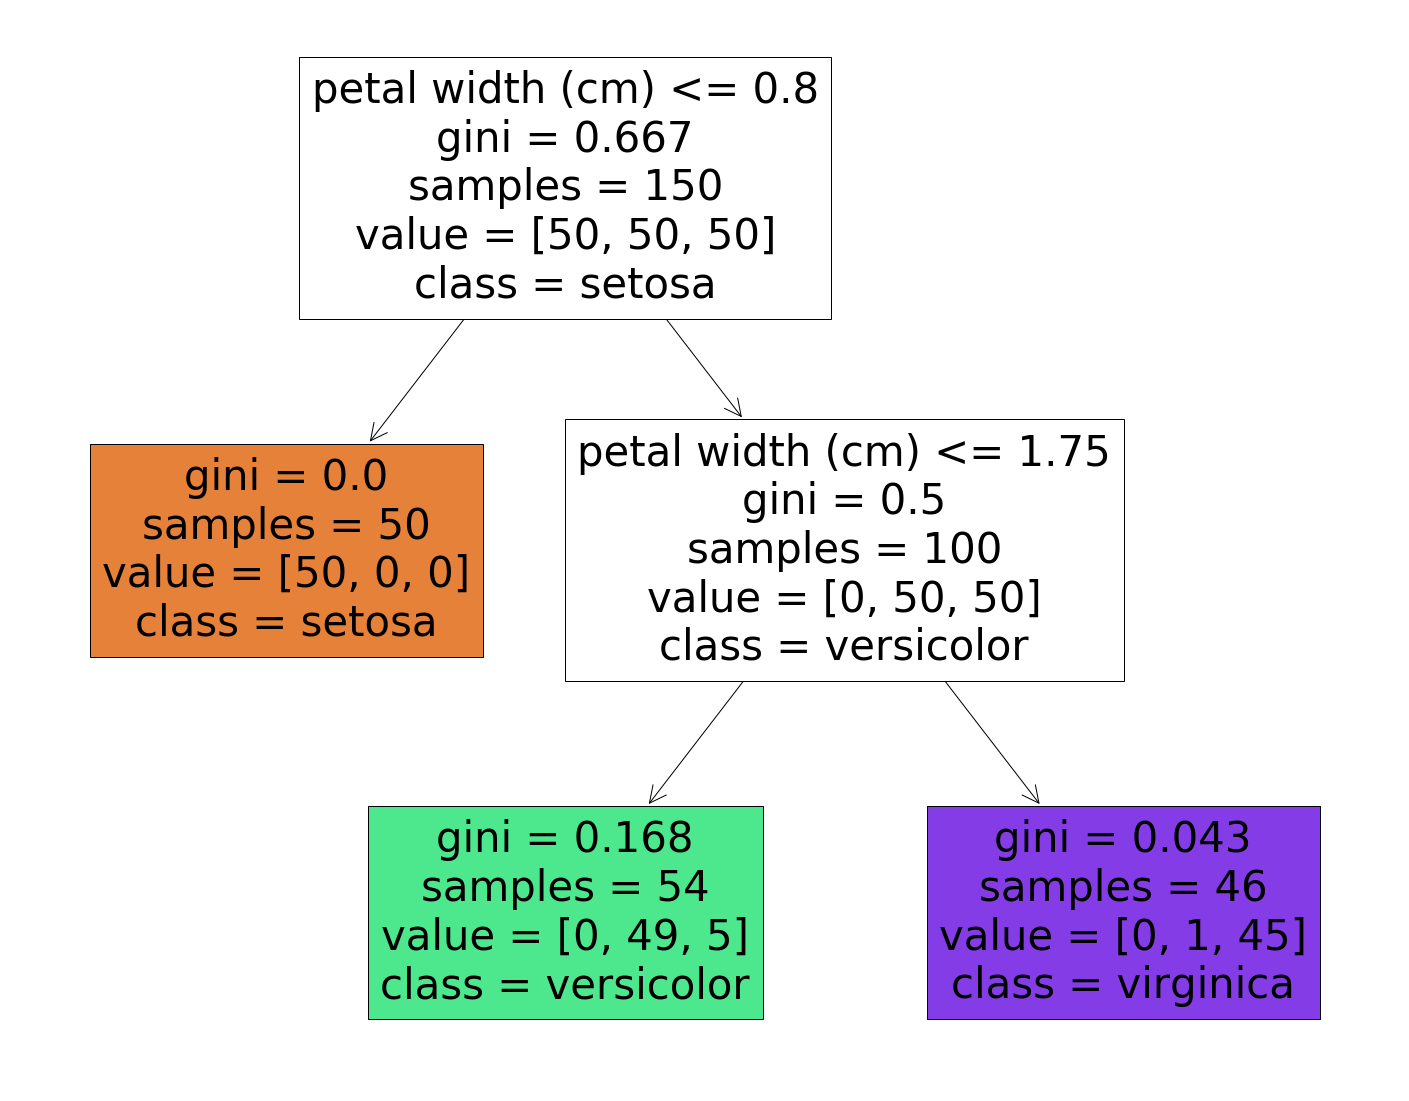

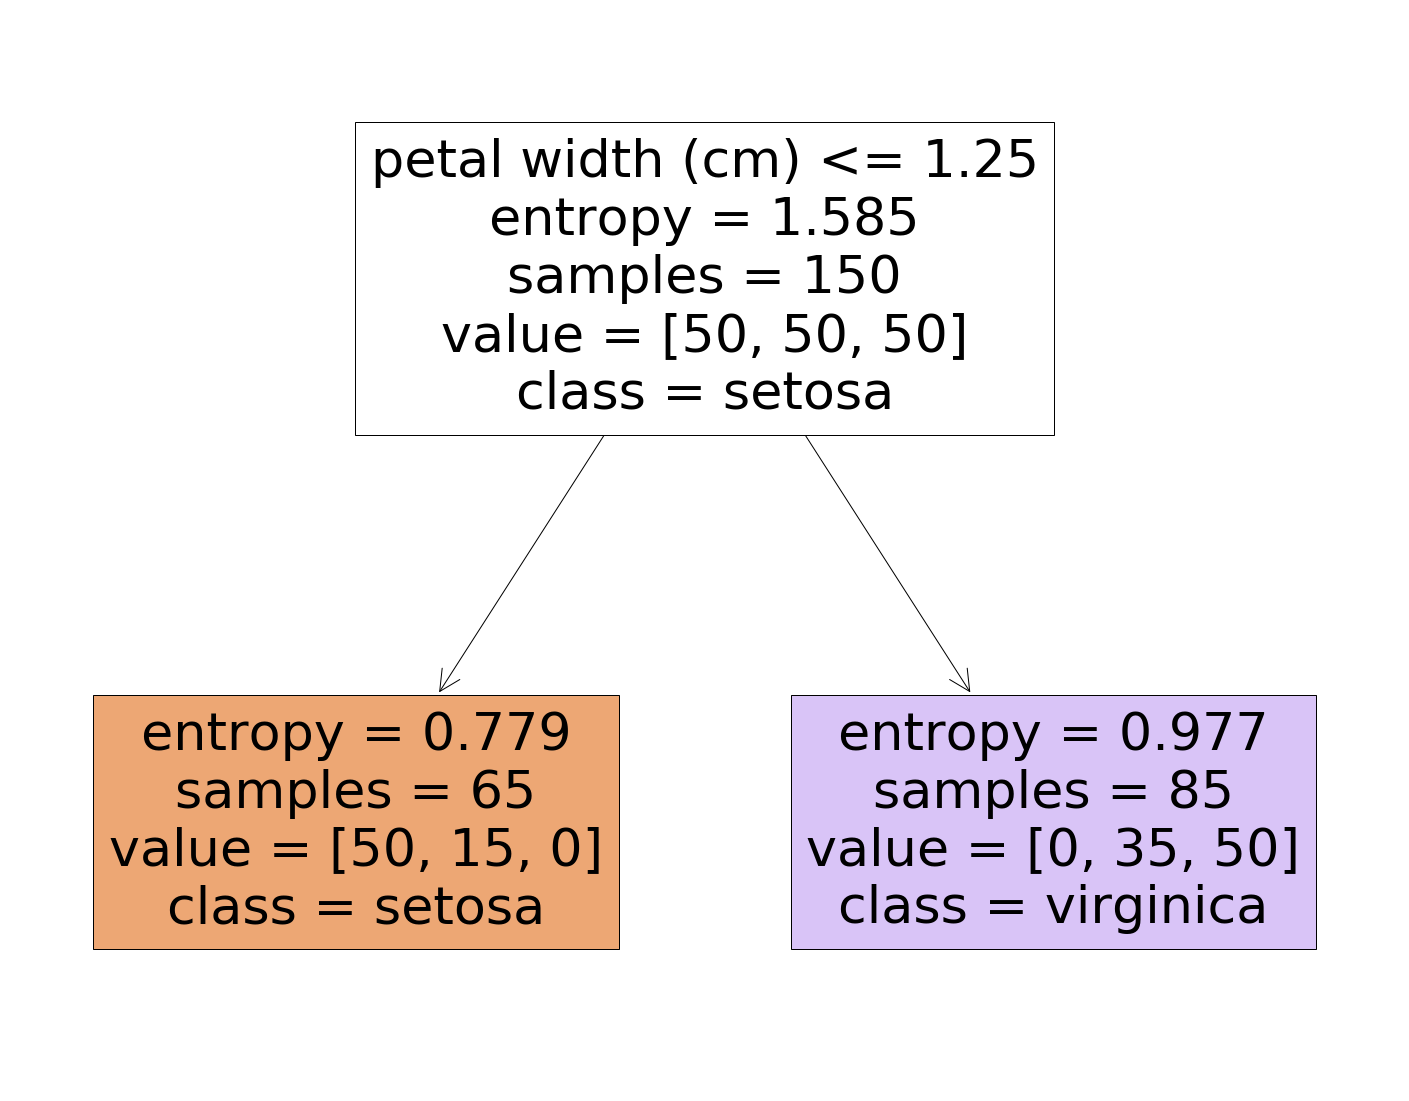

In [48]:
''' 
Overwrtie these variables
Default Values - 
criterion = 'gini'
splitter = 'best'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1 
min_weight_fraction_leaf = 0.0
max_features = None
random_state = None
i = 1 '''

for i in range(15):
    criterion = random.choice(['gini','entropy'])
    splitter = random.choice(['best','random'])
    max_depth = np.random.randint(3, 10)
    min_samples_split = np.random.randint(2,12)
    min_samples_leaf = np.random.randint(1,25)
    min_weight_fraction_leaf = np.random.uniform(0.0,0.5) # Because the values should be 0-0.5
    max_features = random.choice(['auto', 'log2', 'sqrt', None])
    random_state = np.random.randint(0,34)
    
    MyDecisionTree( criterion, splitter, max_depth, min_samples_split,
                    min_samples_leaf, min_weight_fraction_leaf, max_features, 
                    random_state, i+1)

### Tree visualization via Graphviz

In [13]:
import graphviz
# DOT data - since graphviz accepts data in DOT we will convert our tree into a compatable format 
clf = DecisionTreeClassifier(random_state = None)
clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### Trials

In [17]:
np.random.uniform(0,0.5)

0.2366025108335808

In [34]:
random.choice(['best','random'])

'best'

In [43]:
random.choice([np.random.randint(1,10), np.random.uniform(0,1.0), 'auto', 'log2', 'sqrt', None])

0.6372586308792242